In [44]:
import os
import numpy as np
import cv2
import pandas as pd


In [45]:
Origional_paths = []
processed_paths = []
CT_class = []

main_dir = '/kaggle/input/preprocessed-ct-scans-for-covid19'
original_dir = '/kaggle/input/preprocessed-ct-scans-for-covid19/Original CT Scans'
processed_dir = '/kaggle/input/preprocessed-ct-scans-for-covid19/Preprocessed CT scans'
for img_class in os.listdir(original_dir):
    for img in os.listdir(original_dir+ '/' +img_class):
        Origional_paths.append(str(original_dir+"/"+img_class+'/'+img))
        processed_paths.append(str(processed_dir+"/"+img_class+'/'+img))
        CT_class.append(img_class)
        
data_df = pd.DataFrame(data = {'origional' : Origional_paths, 
                              'processed' : processed_paths, 
                              'class' : CT_class })

In [46]:
data_df

,origional,processed,class
0,/kaggle/input/preprocessed-ct-scans-for-covid1...,/kaggle/input/preprocessed-ct-scans-for-covid1...,pCT
1,/kaggle/input/preprocessed-ct-scans-for-covid1...,/kaggle/input/preprocessed-ct-scans-for-covid1...,pCT
2,/kaggle/input/preprocessed-ct-scans-for-covid1...,/kaggle/input/preprocessed-ct-scans-for-covid1...,pCT
3,/kaggle/input/preprocessed-ct-scans-for-covid1...,/kaggle/input/preprocessed-ct-scans-for-covid1...,pCT
4,/kaggle/input/preprocessed-ct-scans-for-covid1...,/kaggle/input/preprocessed-ct-scans-for-covid1...,pCT
...,...,...,...
19680,/kaggle/input/preprocessed-ct-scans-for-covid1...,/kaggle/input/preprocessed-ct-scans-for-covid1...,nCT
19681,/kaggle/input/preprocessed-ct-scans-for-covid1...,/kaggle/input/preprocessed-ct-scans-for-covid1...,nCT
19682,/kaggle/input/preprocessed-ct-scans-for-covid1...,/kaggle/input/preprocessed-ct-scans-for-covid1...,nCT
19683,/kaggle/input/preprocessed-ct-scans-for-covid1...,/kaggle/input/preprocessed-ct-scans-for-covid1...,nCT


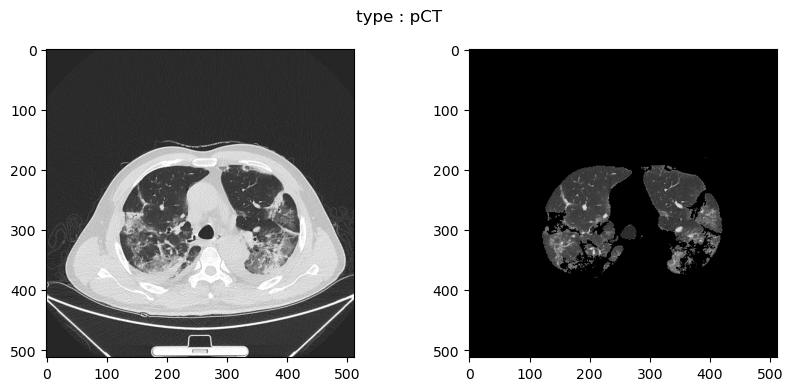

In [48]:
from matplotlib import pyplot as plt
import cv2

sample = data_df.iloc[15]
img = cv2.imread(sample[0])
cut_img  = cv2.imread(sample[1])
class_type = sample[2]


fig, ax = plt.subplots(1,2,constrained_layout=False, figsize =(10,4))
ax[0].imshow(img)
ax[1].imshow(cut_img)
fig.suptitle(f'type : {class_type}')
fig.show()

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

batch_size = 24
random_state = 7

classes = list(data_df['class'].unique())
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
size = (224,224,3)
img_width = img_hight = size[0]

Paper_train_split , Paper_test_split , _ , _ = train_test_split(
        data_df, data_df['class'], train_size=0.8, random_state=7, stratify=data_df['class'])

Paper_train_split

,origional,processed,class
7985,/kaggle/input/preprocessed-ct-scans-for-covid1...,/kaggle/input/preprocessed-ct-scans-for-covid1...,NiCT
3835,/kaggle/input/preprocessed-ct-scans-for-covid1...,/kaggle/input/preprocessed-ct-scans-for-covid1...,pCT
4979,/kaggle/input/preprocessed-ct-scans-for-covid1...,/kaggle/input/preprocessed-ct-scans-for-covid1...,NiCT
18758,/kaggle/input/preprocessed-ct-scans-for-covid1...,/kaggle/input/preprocessed-ct-scans-for-covid1...,nCT
11119,/kaggle/input/preprocessed-ct-scans-for-covid1...,/kaggle/input/preprocessed-ct-scans-for-covid1...,nCT
...,...,...,...
8868,/kaggle/input/preprocessed-ct-scans-for-covid1...,/kaggle/input/preprocessed-ct-scans-for-covid1...,NiCT
13583,/kaggle/input/preprocessed-ct-scans-for-covid1...,/kaggle/input/preprocessed-ct-scans-for-covid1...,nCT
14983,/kaggle/input/preprocessed-ct-scans-for-covid1...,/kaggle/input/preprocessed-ct-scans-for-covid1...,nCT
312,/kaggle/input/preprocessed-ct-scans-for-covid1...,/kaggle/input/preprocessed-ct-scans-for-covid1...,pCT


In [57]:
paper_train_data = data_gen.flow_from_dataframe(Paper_train_split, x_col='origional', y_col='class',
                                          image_size=(img_hight, img_width), target_size=(
                                              img_hight, img_hight), color_mode='rgb',
                                          batch_size=batch_size, class_mode='categorical',
                                          classes=classes, subset=None, validate_filenames= False,seed=42)

Unshuffled_paper_train_data = data_gen.flow_from_dataframe(Paper_train_split, x_col='origional', y_col='class',
                                          image_size=(img_hight, img_width), target_size=(
                                              img_hight, img_hight), color_mode='rgb',
                                          batch_size=batch_size, class_mode='categorical',
                                          classes=classes, subset=None, validate_filenames= False,seed=42, shuffle = False)

#Validation Data Generator
Unshuffled_paper_val_data = data_gen.flow_from_dataframe(Paper_test_split, x_col='origional', y_col='class',
                                          image_size=(img_hight, img_width), target_size=(
                                              img_hight, img_hight), color_mode='rgb',
                                          batch_size=batch_size, class_mode='categorical',
                                          classes=classes, subset=None, validate_filenames= False,seed=42,shuffle = False)

Found 15748 non-validated image filenames belonging to 3 classes.
Found 15748 non-validated image filenames belonging to 3 classes.
Found 3937 non-validated image filenames belonging to 3 classes.


In [68]:
sample = next(paper_train_data)
sample[0].shape, sample[1].shape, sample[1]

((24, 224, 224, 3),
 (24, 3),
 array([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.]], dtype=float32))

In [77]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,GRU, LSTM
from keras.layers import Activation, TimeDistributed, LSTM, BatchNormalization
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers.legacy import SGD, Adam
from keras.models import Sequential, Model

size = (224, 224,3)

def create_cnn_lstm(Image_shape=size, block1=True, block2=True, block3=True,
                 block4=True, block5=True, lstm=True, regularizer=keras.regularizers.l2(0.0001),
                 Dropout_ratio=0.15):

    # * Create the model
    model = keras.Sequential()

    # * configure the inputshape
    model.add(keras.Input(shape=Image_shape))

    # * Add the first block
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu',
              trainable=block1, kernel_regularizer=regularizer))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu',
              trainable=block1, kernel_regularizer=regularizer))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    # * Add the second block
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu',
              trainable=block2, kernel_regularizer=regularizer))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu',
              trainable=block2, kernel_regularizer=regularizer))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    # * Add the third block
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu',
              trainable=block3, kernel_regularizer=regularizer))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu',
              trainable=block3, kernel_regularizer=regularizer))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    # * Add the fourth block
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu',
              trainable=block4, kernel_regularizer=regularizer))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu',
              trainable=block4, kernel_regularizer=regularizer))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu',
              trainable=block4, kernel_regularizer=regularizer))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    # * Add the fifth block
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu',
              trainable=block5, kernel_regularizer=regularizer))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu',
              trainable=block5, kernel_regularizer=regularizer))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu',
              trainable=block5, kernel_regularizer=regularizer))
    
    model.add((MaxPooling2D(pool_size=(2, 2))))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    # * Reshape the output of the last layer to be used in the LSTM layer
    model.add(keras.layers.Reshape((7*7, 512)))
    model.add(LSTM(512, activation='relu', trainable=lstm, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    #* flatten + Fc layer
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(Dropout_ratio))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    # * Output layer
    #model.add(Dense(3, activation='linear'))
    model.add(Dense(3, activation='softmax'))
    #print('Done')
    return model

def cnn_lstm_compile(model, loss = 'categorical_crossentropy', optimizer = Adam(learning_rate=0.0001, decay=1e-6)):
    model.compile(
        #loss =keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        loss=loss,
        optimizer=optimizer,
        metrics=['accuracy']
    )

In [78]:
model_atm1 = create_cnn_lstm()
#model_atm1.summary()
#display(tf.keras.utils.plot_model(model_atm1, to_file='unet.png', show_shapes=True))

In [80]:
checkpoint =tf.keras.callbacks.ModelCheckpoint(filepath='CNN-LSTM-model.h5', 
                                monitor='val_accuracy',
                                mode='max',
                                verbose=1,
                                save_best_only=True,
                                save_weights_only=True)

earlystop= tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                            min_delta = 0, 
                            patience = 30,
                            verbose = 1,
                            restore_best_weights = True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                              patience=6, 
                                              verbose=1, 
                                              factor=0.2, 
                                              min_lr=0.00000001)
model_atm1= create_cnn_lstm()
cnn_lstm_compile(model_atm1)



In [ ]:
history = model_atm1.fit(
        paper_train_data, 
        validation_data= Unshuffled_paper_val_data, 
        epochs=46, 
        callbacks=[earlystop,checkpoint, reduce_lr])

Epoch 1/46
